In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
import ROOT
%jsroot on

Welcome to JupyROOT 6.22/06


In [2]:
data = uproot.open("/eos/user/n/nkasarag/NSM_5M_TB_HGCAL_flat_pion_samples/skimmed_ntuple_sim_config22_pions_0to1M_combinedHgc_Ahc_v46.root")

In [3]:
lst = ['rechitEn_trimAhcal',
 'comb_rechit_x_trimAhcal',
 'comb_rechit_y_trimAhcal',
 'comb_rechit_z_trimAhcal',
      'trueBeamEnergy']

In [4]:
df_ori = data["pion_variables_v1"].pandas.df(lst, flatten=False, entrystart=0, entrystop=100000)
df_ori.head()

,rechitEn_trimAhcal,comb_rechit_x_trimAhcal,comb_rechit_y_trimAhcal,comb_rechit_z_trimAhcal,trueBeamEnergy
entry,,,,,
0,"[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",232.958725
1,"[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",59.094654
2,"[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",250.189209
3,"[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",312.932007
4,"[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...",62.493023


In [5]:
df_red4 = pd.read_pickle("pkl_files/0to1M/event_0to100000_0to1M.pickle")

df_red4.head()

,reduced_x,reduced_y,reduced_z,reduced_ene,trueBeamEnergy
0,"[-1.9435272, -0.9717636, -1.9435272, 0.0, -1.9...","[2.244192, 1.683144, 1.122096, 2.244192, 1.122...","[53.9035, 53.9035, 53.9035, 53.9035, 64.618499...","[26.847816, 3.9772964, 23.278805, 2.0315533, 1...",232.958725
1,"[-2.9152908, -1.9435272, -4.858818, -3.8870544...","[1.683144, 4.488384, 1.683144, 3.366288, 4.488...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[48.879124, 4.356519, 1.1780807, 4.664068, 0.5...",59.094654
2,"[-2.9152908, -1.9435272, -2.9152908, -2.915290...","[1.683144, 1.122096, 2.80524, 0.561048, 1.1220...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[88.55112, 1.6975256, 1.0758208, 10.790803, 22...",250.189209
3,"[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[2.80524, 1.683144, -0.561048, -1.122096, 2.24...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[33.403385, 11.067838, 4.292442, 1.5654237, 10...",312.932007
4,"[-2.9152908, -3.8870544, -4.858818, -1.9435272...","[1.683144, 1.122096, -1.683144, -1.122096, 2.2...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[489.7334, 48.698444, 1.915538, 0.49860385, 37...",62.493023


In [6]:
def x_ce_ori(df_):
    return df_.comb_rechit_x_trimAhcal[df_.comb_rechit_z_trimAhcal<154]

def y_ce_ori(df_):
    return df_.comb_rechit_y_trimAhcal[df_.comb_rechit_z_trimAhcal<154]

def x_ahcal_ori(df_):
    return df_.comb_rechit_x_trimAhcal[df_.comb_rechit_z_trimAhcal>154]

def y_ahcal_ori(df_):
    return df_.comb_rechit_y_trimAhcal[df_.comb_rechit_z_trimAhcal>154]

df_ori["x_ce_ori"] = df_ori.apply(x_ce_ori, axis=1)
df_ori["y_ce_ori"] = df_ori.apply(y_ce_ori, axis=1)
df_ori["x_ahcal_ori"] = df_ori.apply(x_ahcal_ori, axis=1)
df_ori["y_ahcal_ori"] = df_ori.apply(y_ahcal_ori, axis=1)
df_ori.head()

,rechitEn_trimAhcal,comb_rechit_x_trimAhcal,comb_rechit_y_trimAhcal,comb_rechit_z_trimAhcal,trueBeamEnergy,x_ce_ori,y_ce_ori,x_ahcal_ori,y_ahcal_ori
entry,,,,,,,,,
0,"[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",232.958725,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[1.5, 4.5, -1.5, -4.5, 1.5, 4.5, 7.5, -1.5, -7...","[1.5, 1.5, 1.5, 1.5, 4.5, 4.5, 4.5, 4.5, 4.5, ..."
1,"[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",59.094654,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...",[],[]
2,"[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",250.189209,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[22.5, -4.5, 34.5, 10.5, -1.5, -10.5, -13.5, 3...","[1.5, 1.5, 7.5, 10.5, 13.5, 19.5, 19.5, 25.5, ..."
3,"[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",312.932007,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[19.5, 4.5, -7.5, 1.5, -4.5, -7.5, 10.5, 7.5, ...","[1.5, 4.5, 4.5, 7.5, 7.5, 10.5, 13.5, 16.5, 19..."
4,"[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...",62.493023,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[10.5, 1.5, 7.5, 13.5, 10.5, 4.5, 10.5, 4.5, 1...","[-1.5, -4.5, 34.5, -1.5, -4.5, -7.5, -7.5, -13..."


In [7]:
def x_ce_red(df_):
    return df_.reduced_x[df_.reduced_z<154]

def y_ce_red(df_):
    return df_.reduced_y[df_.reduced_z<154]

def x_ahcal_red(df_):
    return df_.reduced_x[df_.reduced_z>154]

def y_ahcal_red(df_):
    return df_.reduced_y[df_.reduced_z>154]

df_red4["x_ce_red"] = df_red4.apply(x_ce_red, axis=1)
df_red4["y_ce_red"] = df_red4.apply(y_ce_red, axis=1)
df_red4["x_ahcal_red"] = df_red4.apply(x_ahcal_red, axis=1)
df_red4["y_ahcal_red"] = df_red4.apply(y_ahcal_red, axis=1)
df_red4.head()

,reduced_x,reduced_y,reduced_z,reduced_ene,trueBeamEnergy,x_ce_red,y_ce_red,x_ahcal_red,y_ahcal_red
0,"[-1.9435272, -0.9717636, -1.9435272, 0.0, -1.9...","[2.244192, 1.683144, 1.122096, 2.244192, 1.122...","[53.9035, 53.9035, 53.9035, 53.9035, 64.618499...","[26.847816, 3.9772964, 23.278805, 2.0315533, 1...",232.958725,"[-1.9435272, -0.9717636, -1.9435272, 0.0, -1.9...","[2.244192, 1.683144, 1.122096, 2.244192, 1.122...","[1.5, 4.5, -1.5, -4.5, 1.5, 4.5, 7.5, -1.5, -7...","[1.5, 1.5, 1.5, 1.5, 4.5, 4.5, 4.5, 4.5, 4.5, ..."
1,"[-2.9152908, -1.9435272, -4.858818, -3.8870544...","[1.683144, 4.488384, 1.683144, 3.366288, 4.488...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[48.879124, 4.356519, 1.1780807, 4.664068, 0.5...",59.094654,"[-2.9152908, -1.9435272, -4.858818, -3.8870544...","[1.683144, 4.488384, 1.683144, 3.366288, 4.488...",[],[]
2,"[-2.9152908, -1.9435272, -2.9152908, -2.915290...","[1.683144, 1.122096, 2.80524, 0.561048, 1.1220...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[88.55112, 1.6975256, 1.0758208, 10.790803, 22...",250.189209,"[-2.9152908, -1.9435272, -2.9152908, -2.915290...","[1.683144, 1.122096, 2.80524, 0.561048, 1.1220...","[22.5, -4.5, 34.5, 10.5, -1.5, -10.5, -13.5, 3...","[1.5, 1.5, 7.5, 10.5, 13.5, 19.5, 19.5, 25.5, ..."
3,"[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[2.80524, 1.683144, -0.561048, -1.122096, 2.24...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[33.403385, 11.067838, 4.292442, 1.5654237, 10...",312.932007,"[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[2.80524, 1.683144, -0.561048, -1.122096, 2.24...","[19.5, 4.5, -7.5, 1.5, -4.5, -7.5, 10.5, 7.5, ...","[1.5, 4.5, 4.5, 7.5, 7.5, 10.5, 13.5, 16.5, 19..."
4,"[-2.9152908, -3.8870544, -4.858818, -1.9435272...","[1.683144, 1.122096, -1.683144, -1.122096, 2.2...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[489.7334, 48.698444, 1.915538, 0.49860385, 37...",62.493023,"[-2.9152908, -3.8870544, -4.858818, -1.9435272...","[1.683144, 1.122096, -1.683144, -1.122096, 2.2...","[10.5, 1.5, 7.5, 13.5, 10.5, 4.5, 10.5, 4.5, 1...","[-1.5, -4.5, 34.5, -1.5, -4.5, -7.5, -7.5, -13..."


In [8]:
#xy_ce_ori = np.unique(np.concatenate((np.hstack(df_ori.head(1000).x_ce_ori.values).reshape(-1,1), np.hstack(df_ori.head(1000).y_ce_ori.values).reshape(-1,1)), axis=1), axis=0)
#xy_ce_red4 = np.unique(np.concatenate((np.hstack(df_red4.head(1000).x_ce_red.values).reshape(-1,1), np.hstack(df_red4.head(1000).y_ce_red.values).reshape(-1,1)), axis=1), axis=0)
#xy_ce_red16 = np.unique(np.concatenate((np.hstack(df_red16.head(1000).x_ce_red.values).reshape(-1,1), np.hstack(df_red16.head(1000).y_ce_red.values).reshape(-1,1)), axis=1), axis=0)#

In [9]:
#xy_ahcal_ori = np.unique(np.concatenate((np.hstack(df_ori.head(1000).x_ahcal_ori.values).reshape(-1,1), np.hstack(df_ori.head(1000).y_ahcal_ori.values).reshape(-1,1)), axis=1), axis=0)
#xy_ahcal_red4 = np.unique(np.concatenate((np.hstack(df_red4.head(1000).x_ahcal_red.values).reshape(-1,1), np.hstack(df_red4.head(1000).y_ahcal_red.values).reshape(-1,1)), axis=1), axis=0)
#xy_ahcal_red16 = np.unique(np.concatenate((np.hstack(df_red16.head(1000).x_ahcal_red.values).reshape(-1,1), np.hstack(df_red16.head(1000).y_ahcal_red.values).reshape(-1,1)), axis=1), axis=0)

No handles with labels found to put in legend.


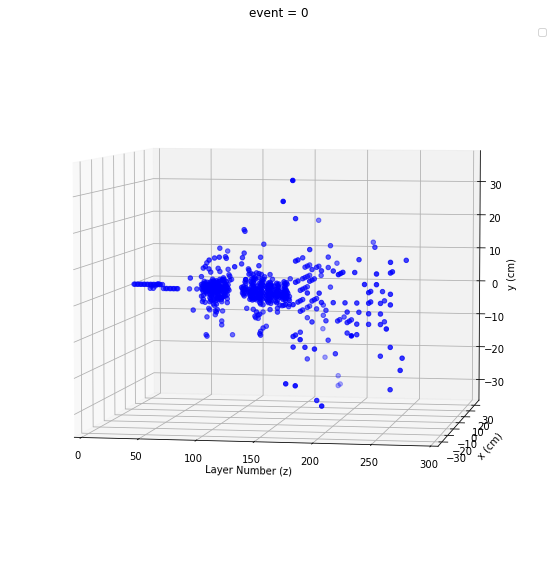

No handles with labels found to put in legend.


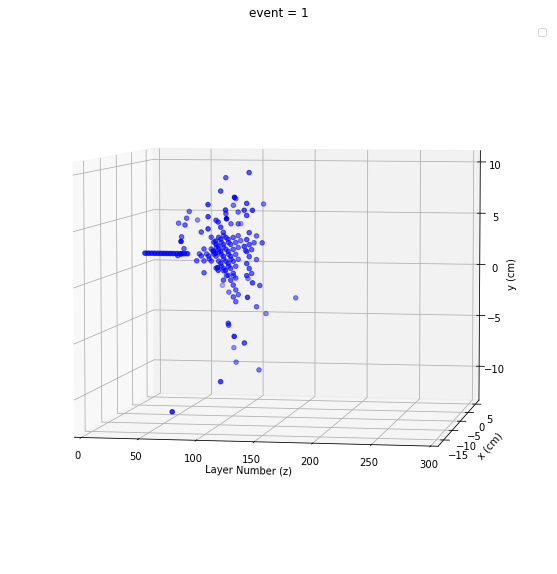

No handles with labels found to put in legend.


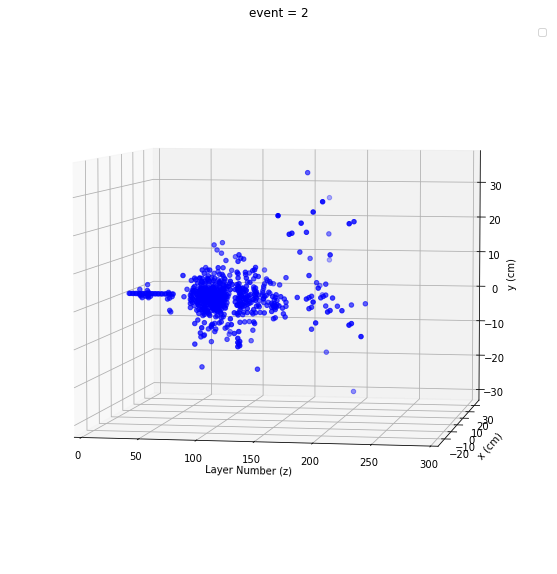

No handles with labels found to put in legend.


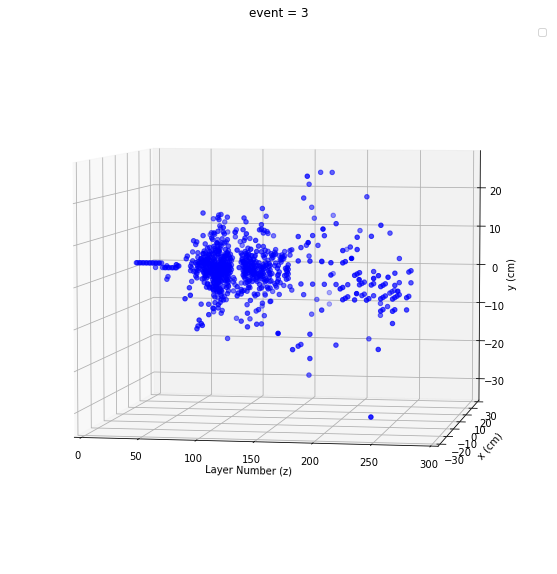

No handles with labels found to put in legend.


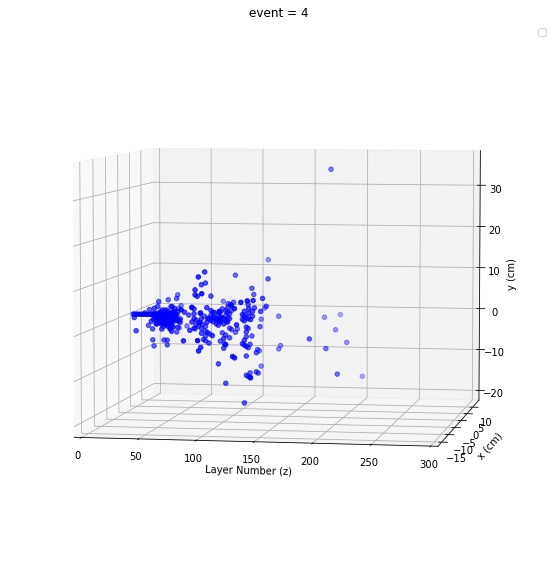

No handles with labels found to put in legend.


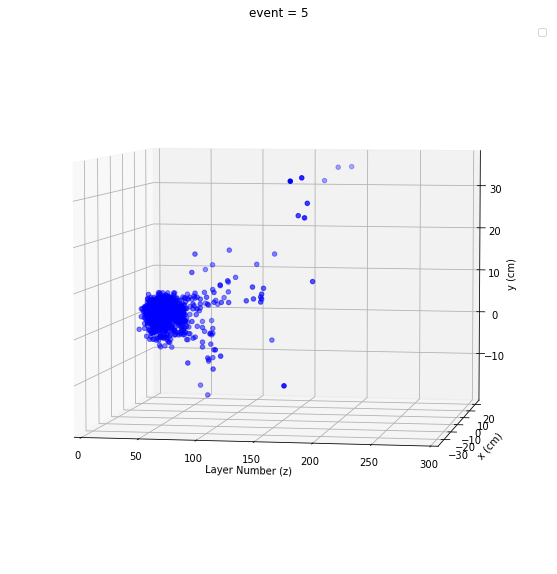

No handles with labels found to put in legend.


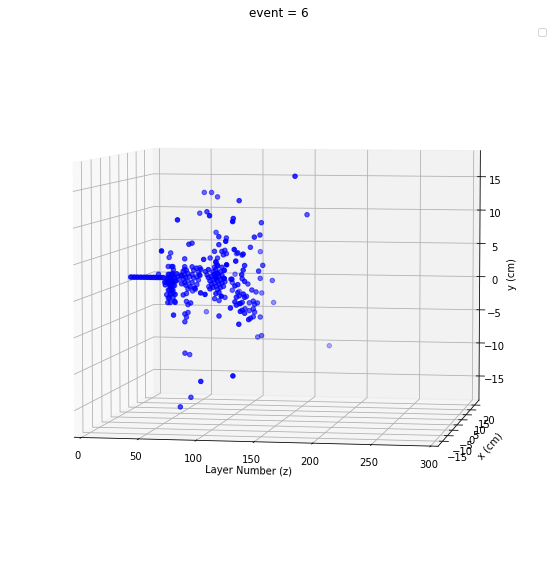

No handles with labels found to put in legend.


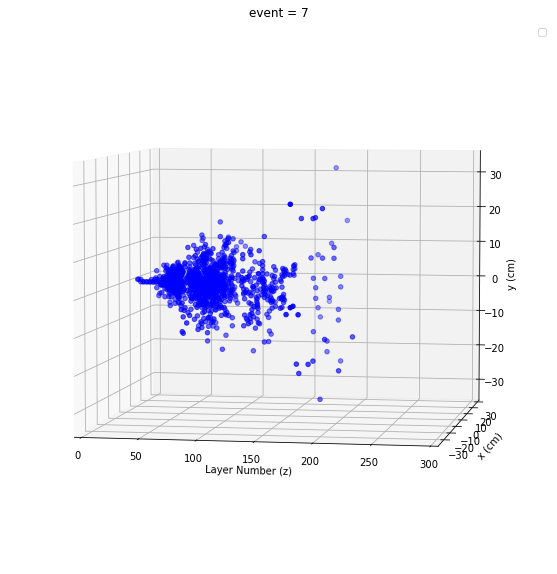

No handles with labels found to put in legend.


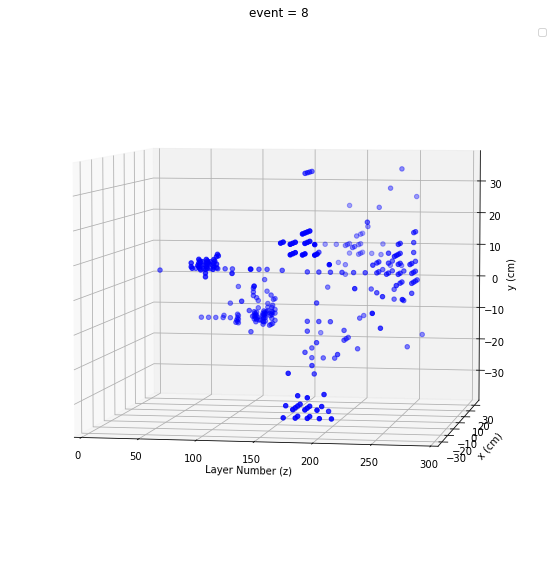

No handles with labels found to put in legend.


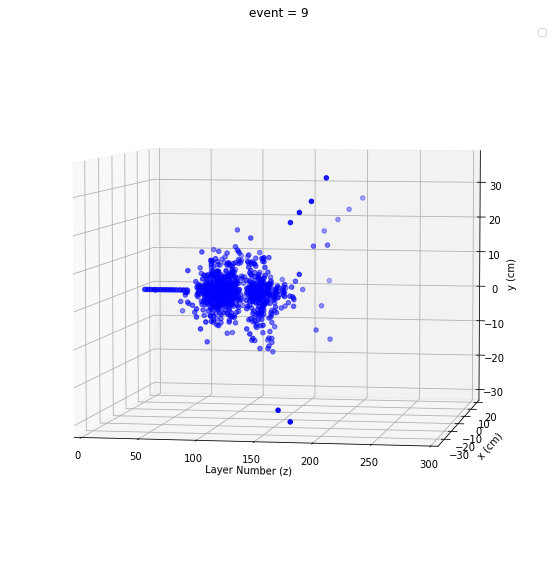

No handles with labels found to put in legend.


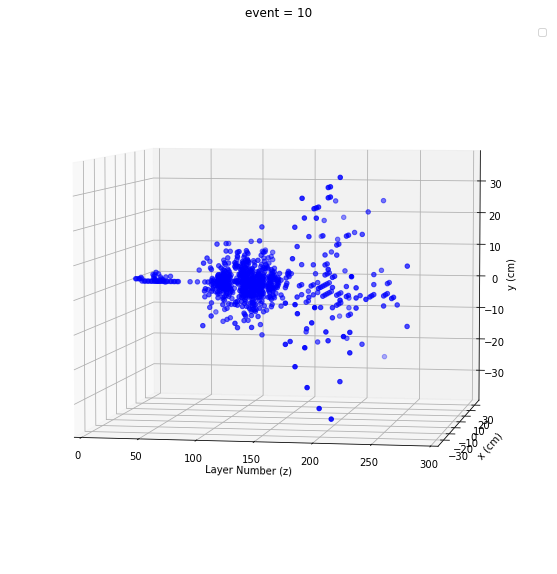

No handles with labels found to put in legend.


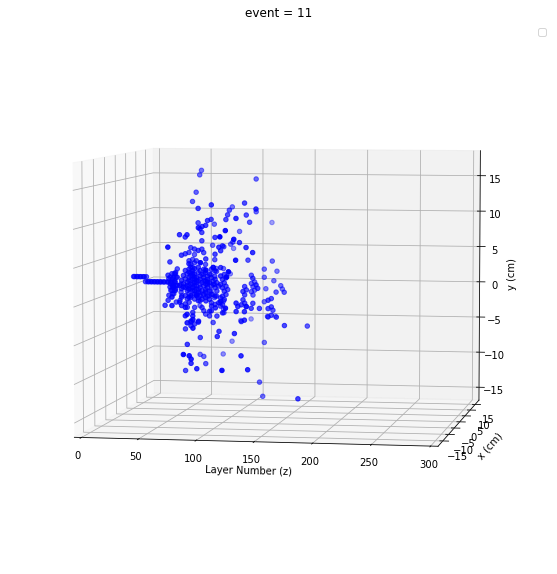

No handles with labels found to put in legend.


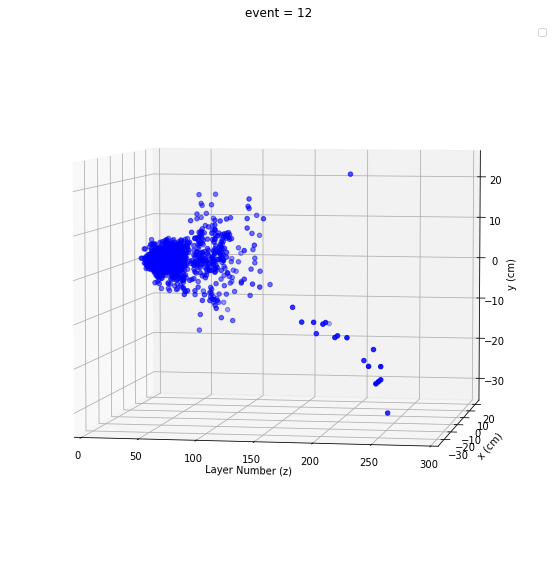

No handles with labels found to put in legend.


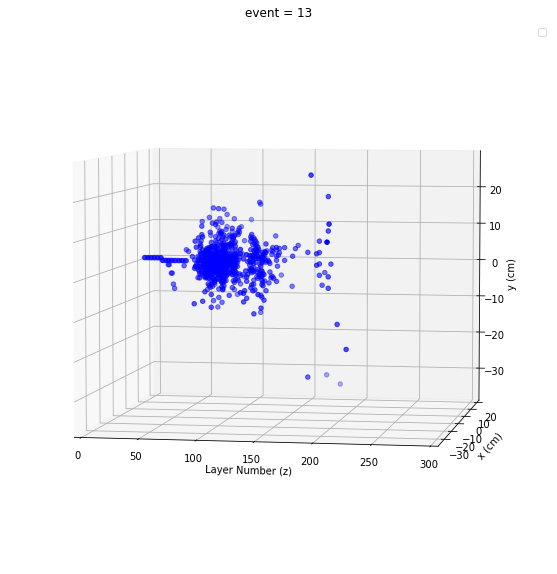

No handles with labels found to put in legend.


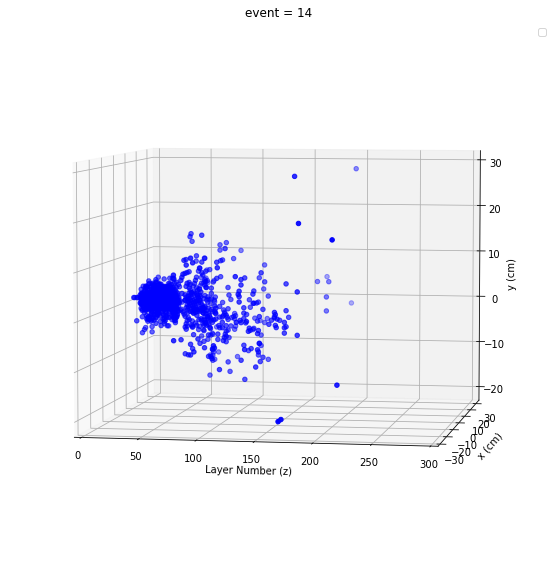

No handles with labels found to put in legend.


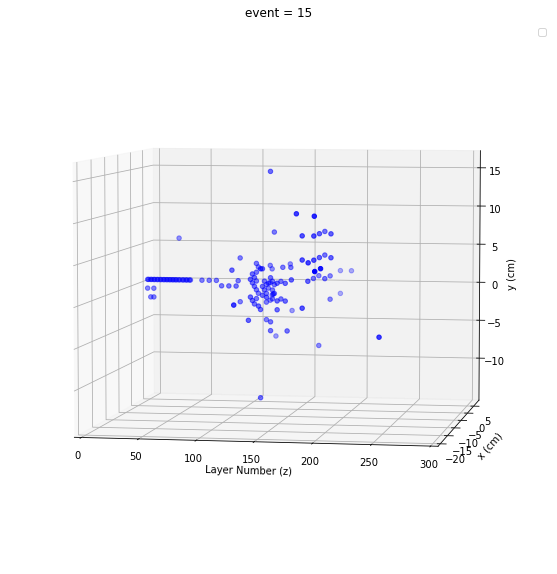

No handles with labels found to put in legend.


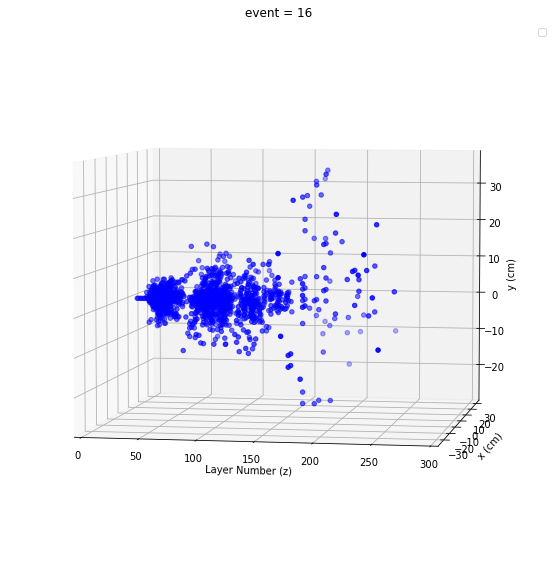

In [29]:
for i in range(0,17):#(new_rechit_values.size):

    fig = plt.figure(figsize = (15, 10)) 

    ax = plt.axes(projection ="3d") 
    ax.view_init(elev=5,azim=-80)  

    z_ori = df_ori.comb_rechit_z_trimAhcal.values[i]
    x_ori = df_ori.comb_rechit_x_trimAhcal.values[i]
    y_ori = df_ori.comb_rechit_y_trimAhcal.values[i]
    
    z_reduced4 = df_red4.reduced_z.values[i]
    x_reduced4 = df_red4.reduced_x.values[i]
    y_reduced4 = df_red4.reduced_y.values[i]
    
    #z_reduced16 = df_red16.reduced_z.values[i]
    #x_reduced16 = df_red16.reduced_x.values[i]
    #y_reduced16 = df_red16.reduced_y.values[i]
    

    ax.scatter3D(z_ori, x_ori, y_ori, color = "blue")#,label="HGCAL_Original")

    #ax.scatter3D(z_reduced4, x_reduced4, y_reduced4, color = "red")#,label="HGCAL-Reduced_by4")
    
    #ax.scatter3D(z_reduced16, x_reduced16, y_reduced16, color = "green",label="HGCAL_Reduced_by16")

    #ax.scatter3D(z_muon, x_muon, y_muon, color = "red",label="Muon (200GeV)")

    ax.set_xlabel('Layer Number (z)')
    ax.set_ylabel('x (cm)')
    ax.set_zlabel('y (cm)')
    
    ax.set_xlim([0,300])
    
    #ax.set_title("event = %s"%int(i))

    plt.title("event = %s"%int(i)) 
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


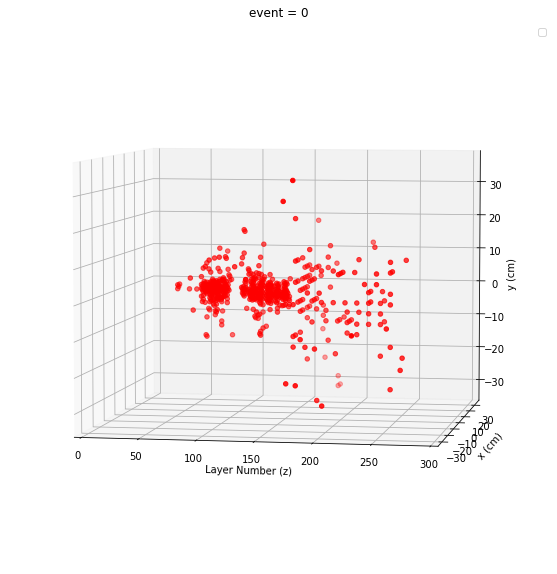

No handles with labels found to put in legend.


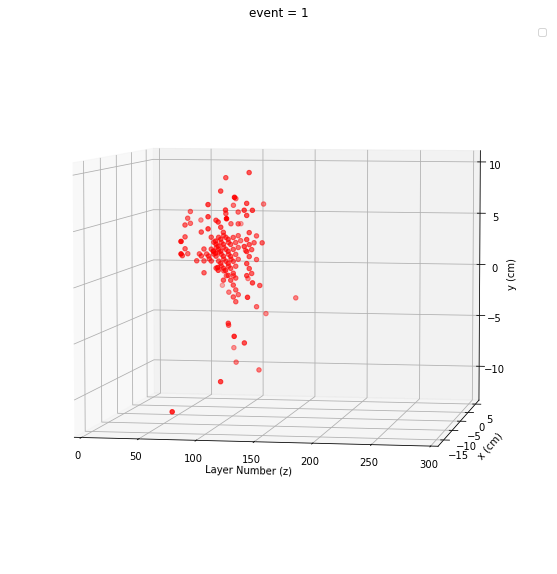

No handles with labels found to put in legend.


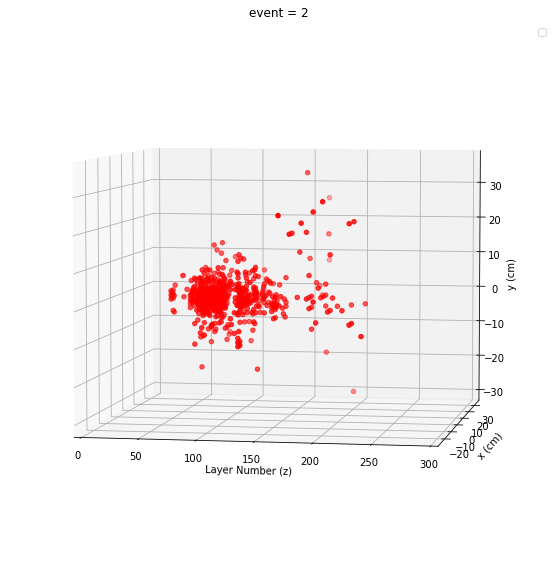

No handles with labels found to put in legend.


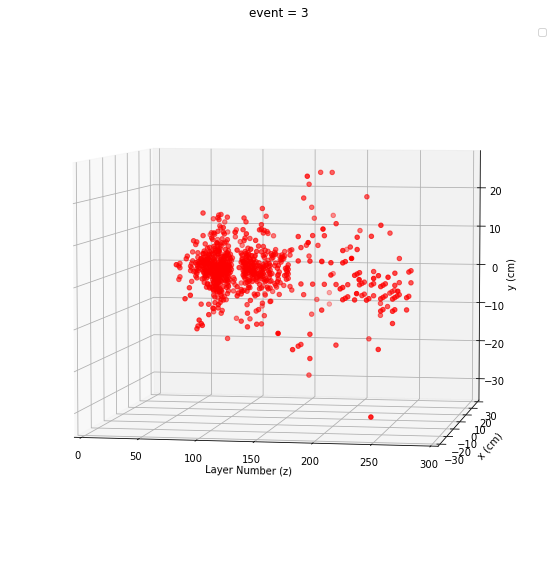

No handles with labels found to put in legend.


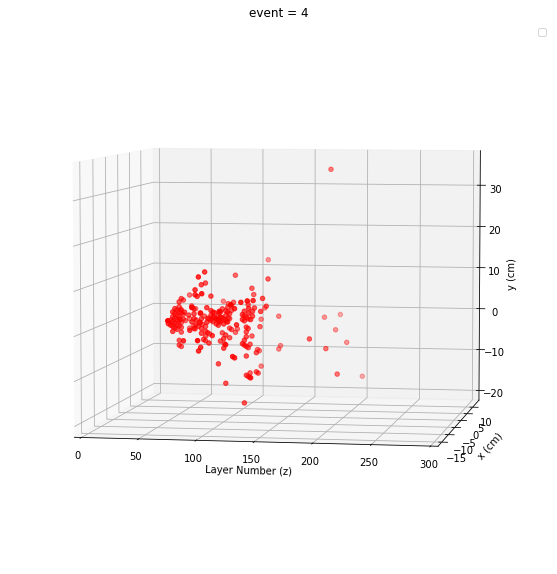

No handles with labels found to put in legend.


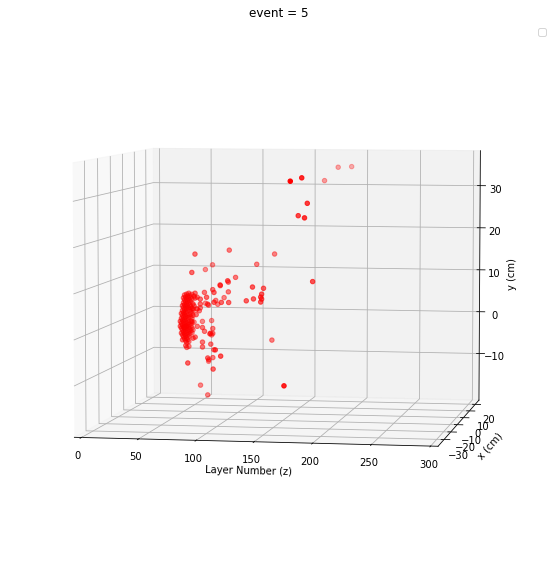

No handles with labels found to put in legend.


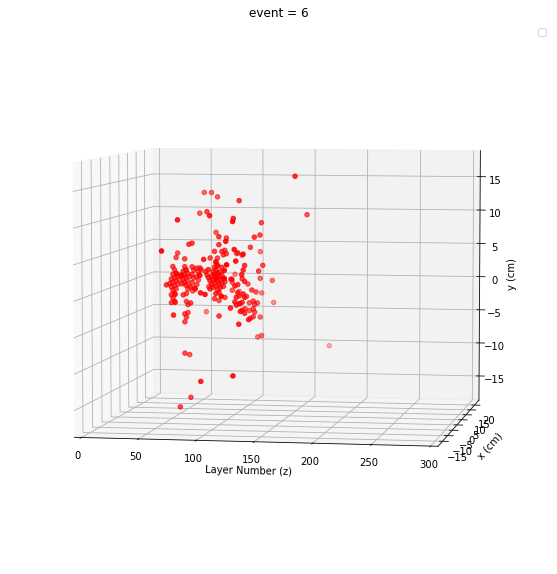

No handles with labels found to put in legend.


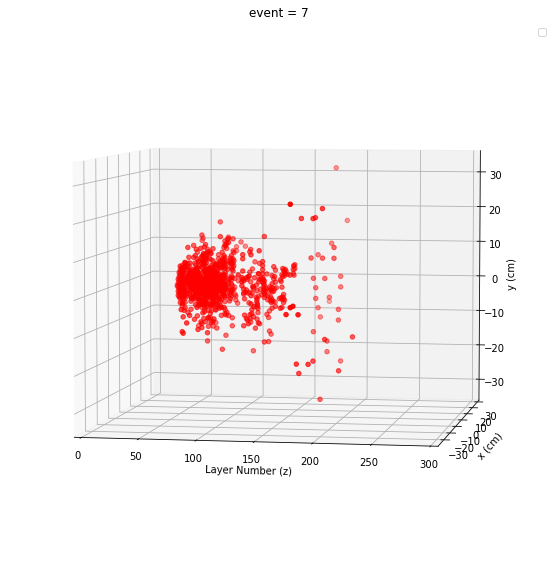

No handles with labels found to put in legend.


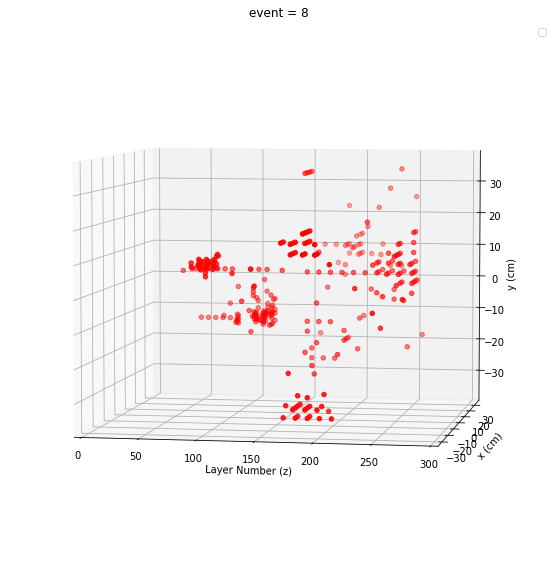

No handles with labels found to put in legend.


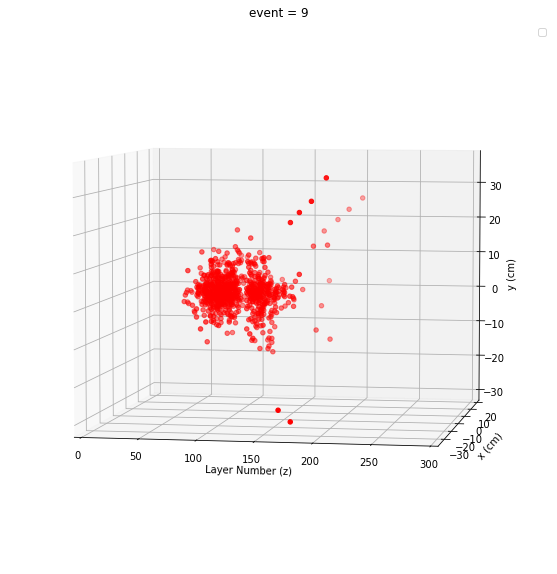

No handles with labels found to put in legend.


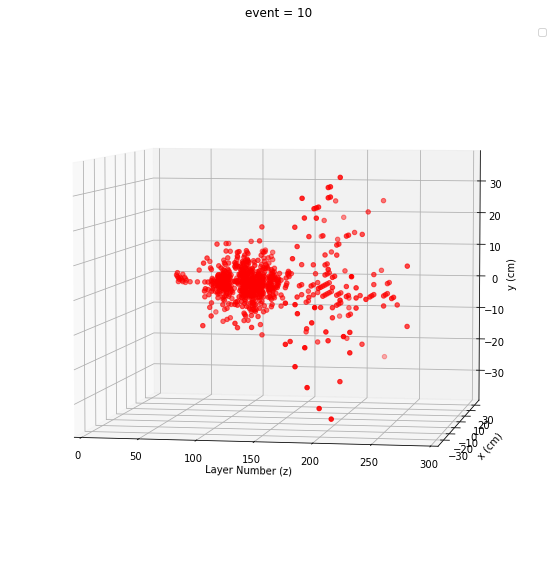

No handles with labels found to put in legend.


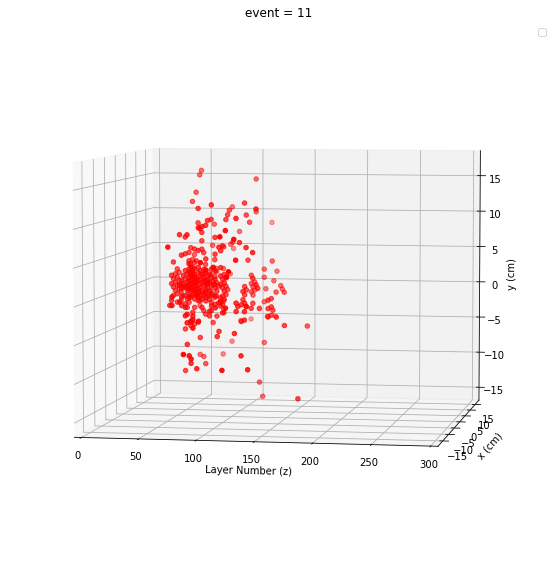

No handles with labels found to put in legend.


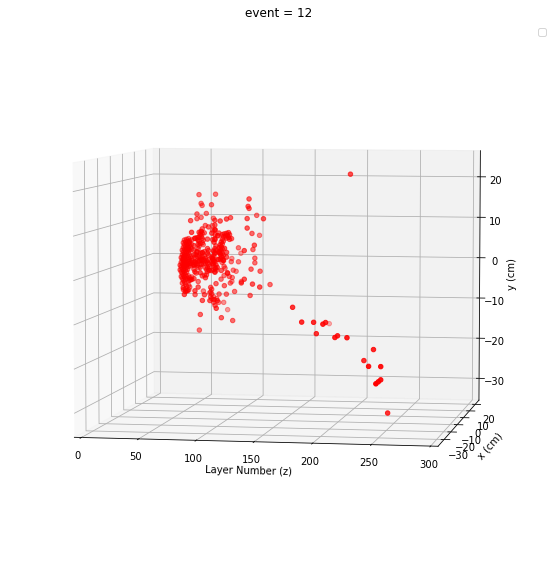

No handles with labels found to put in legend.


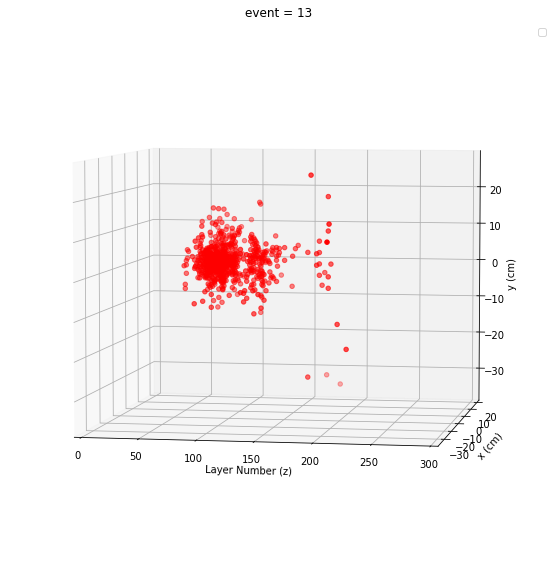

No handles with labels found to put in legend.


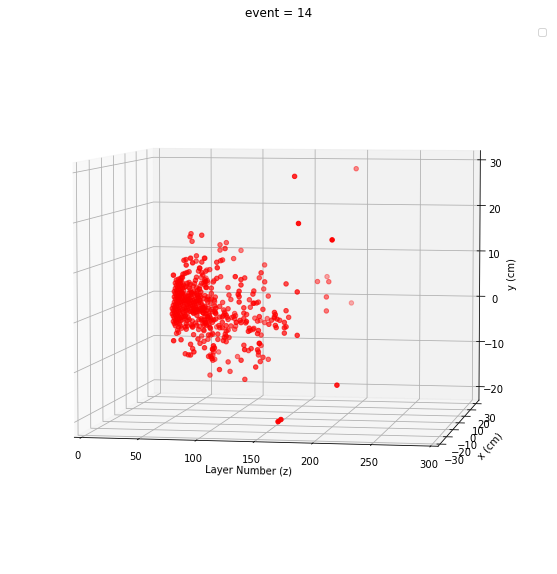

No handles with labels found to put in legend.


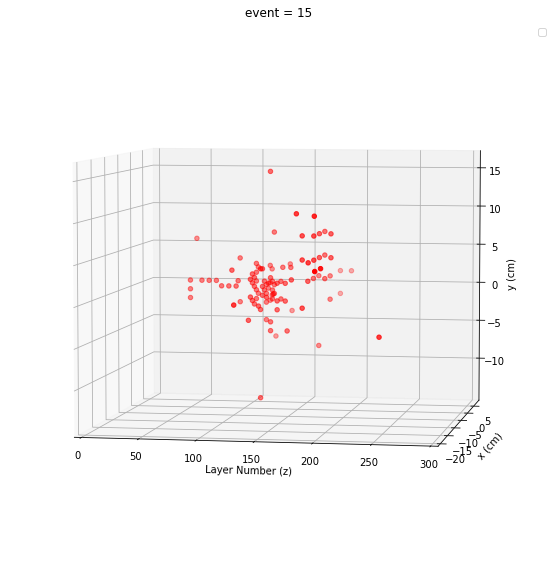

No handles with labels found to put in legend.


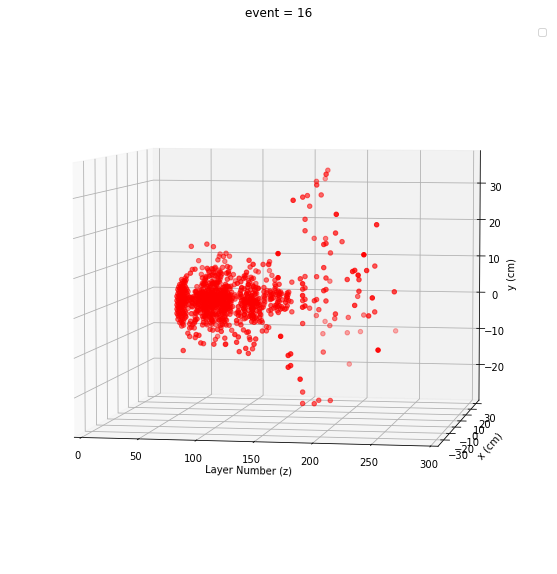

In [28]:
for i in range(0,17):#(new_rechit_values.size):

    fig = plt.figure(figsize = (15, 10)) 

    ax = plt.axes(projection ="3d") 
    ax.view_init(elev=5,azim=-80)  

    z_ori = df_ori.comb_rechit_z_trimAhcal.values[i]
    x_ori = df_ori.comb_rechit_x_trimAhcal.values[i]
    y_ori = df_ori.comb_rechit_y_trimAhcal.values[i]
    
    z_reduced4 = df_red4.reduced_z.values[i]
    x_reduced4 = df_red4.reduced_x.values[i]
    y_reduced4 = df_red4.reduced_y.values[i]
    
    #z_reduced16 = df_red16.reduced_z.values[i]
    #x_reduced16 = df_red16.reduced_x.values[i]
    #y_reduced16 = df_red16.reduced_y.values[i]
    

    #ax.scatter3D(z_ori, x_ori, y_ori, color = "blue")#,label="HGCAL_Original")

    ax.scatter3D(z_reduced4, x_reduced4, y_reduced4, color = "red")#,label="HGCAL-Reduced_by4")
    
    #ax.scatter3D(z_reduced16, x_reduced16, y_reduced16, color = "green",label="HGCAL_Reduced_by16")

    #ax.scatter3D(z_muon, x_muon, y_muon, color = "red",label="Muon (200GeV)")

    ax.set_xlabel('Layer Number (z)')
    ax.set_ylabel('x (cm)')
    ax.set_zlabel('y (cm)')
    
    ax.set_xlim([0,300])
    
    #ax.set_title("event = %s"%int(i))

    plt.title("event = %s"%int(i)) 
    plt.legend()
    plt.show()

In [11]:
df_ori.rechitEn_trimAhcal.map(lambda x : np.sum(x)).values


array([3507.12060547, 1100.48852539, 4279.3125    , ..., 3872.14648438,
       6186.45605469, 2958.04833984])

In [12]:
df_red4.reduced_ene.map(lambda x : np.sum(x)).values


array([3507.12060547, 1100.48852539, 4279.3125    , ..., 3872.14648438,
       6186.45605469, 2958.04833984])

In [13]:
df_ori["num_hits_ori"] = df_ori.comb_rechit_x_trimAhcal.map(lambda x : x.size)
df_red4["num_hits_red"] = df_red4.reduced_x.map(lambda x : x.size)
#df_red16["num_hits_red"] = df_red16.reduced_x.map(lambda x : x.size)

In [14]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Number of Hits;Number of Hits;Frequency", 100,-0.1,2000)
H_pion2 = ROOT.TH1F("H_pion2","Number of hits in all section;Number of hits;Frequency", 100,-0.1,2000)
#H_pion3 = ROOT.TH1F("H_pion3","Number of hits in all section;Number of hits;Frequency", 100,-0.1,2000)

x = df_ori.num_hits_ori.values
y = df_red4.num_hits_red.values
#z = df_red16.num_hits_red.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
#H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion2.Draw("same")
H_pion.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

In [15]:
def num_hits_ee_ori(df_):
    return (df_.rechitEn_trimAhcal[(df_.comb_rechit_z_trimAhcal<54)]).size

def num_hits_ee_red(df_):
    return (df_.reduced_ene[df_.reduced_z<54]).size

def num_hits_eh_ori(df_):
    return (df_.rechitEn_trimAhcal[np.logical_and((df_.comb_rechit_z_trimAhcal>54), (df_.comb_rechit_z_trimAhcal<154))]).size

def num_hits_eh_red(df_):
    return (df_.reduced_ene[np.logical_and(df_.reduced_z>54, df_.reduced_z<154)]).size

def num_hits_ahcal_ori(df_):
    return (df_.rechitEn_trimAhcal[(df_.comb_rechit_z_trimAhcal>154)]).size

def num_hits_ahcal_red(df_):
    return (df_.reduced_ene[df_.reduced_z>154]).size

In [16]:
df_ori["num_hits_ee_ori"] = df_ori.apply(num_hits_ee_ori, axis=1)
df_ori["num_hits_eh_ori"] = df_ori.apply(num_hits_eh_ori, axis=1)
df_ori["num_hits_ahcal_ori"] = df_ori.apply(num_hits_ahcal_ori, axis=1)
df_ori.head()

,rechitEn_trimAhcal,comb_rechit_x_trimAhcal,comb_rechit_y_trimAhcal,comb_rechit_z_trimAhcal,trueBeamEnergy,x_ce_ori,y_ce_ori,x_ahcal_ori,y_ahcal_ori,num_hits_ori,num_hits_ee_ori,num_hits_eh_ori,num_hits_ahcal_ori
entry,,,,,,,,,,,,,
0,"[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",232.958725,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[1.5, 4.5, -1.5, -4.5, 1.5, 4.5, 7.5, -1.5, -7...","[1.5, 1.5, 1.5, 1.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...",573,33,416,124
1,"[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",59.094654,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...",[],[],176,36,140,0
2,"[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",250.189209,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[22.5, -4.5, 34.5, 10.5, -1.5, -10.5, -13.5, 3...","[1.5, 1.5, 7.5, 10.5, 13.5, 19.5, 19.5, 25.5, ...",606,47,512,47
3,"[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",312.932007,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[19.5, 4.5, -7.5, 1.5, -4.5, -7.5, 10.5, 7.5, ...","[1.5, 4.5, 4.5, 7.5, 7.5, 10.5, 13.5, 16.5, 19...",750,32,601,117
4,"[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...",62.493023,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[10.5, 1.5, 7.5, 13.5, 10.5, 4.5, 10.5, 4.5, 1...","[-1.5, -4.5, 34.5, -1.5, -4.5, -7.5, -7.5, -13...",323,147,167,9


In [17]:
df_red4["num_hits_ee_red"] = df_red4.apply(num_hits_ee_red, axis=1)
df_red4["num_hits_eh_red"] = df_red4.apply(num_hits_eh_red, axis=1)
df_red4["num_hits_ahcal_red"] = df_red4.apply(num_hits_ahcal_red, axis=1)
df_red4.head()

,reduced_x,reduced_y,reduced_z,reduced_ene,trueBeamEnergy,x_ce_red,y_ce_red,x_ahcal_red,y_ahcal_red,num_hits_red,num_hits_ee_red,num_hits_eh_red,num_hits_ahcal_red
0,"[-1.9435272, -0.9717636, -1.9435272, 0.0, -1.9...","[2.244192, 1.683144, 1.122096, 2.244192, 1.122...","[53.9035, 53.9035, 53.9035, 53.9035, 64.618499...","[26.847816, 3.9772964, 23.278805, 2.0315533, 1...",232.958725,"[-1.9435272, -0.9717636, -1.9435272, 0.0, -1.9...","[2.244192, 1.683144, 1.122096, 2.244192, 1.122...","[1.5, 4.5, -1.5, -4.5, 1.5, 4.5, 7.5, -1.5, -7...","[1.5, 1.5, 1.5, 1.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...",544,4,416,124
1,"[-2.9152908, -1.9435272, -4.858818, -3.8870544...","[1.683144, 4.488384, 1.683144, 3.366288, 4.488...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[48.879124, 4.356519, 1.1780807, 4.664068, 0.5...",59.094654,"[-2.9152908, -1.9435272, -4.858818, -3.8870544...","[1.683144, 4.488384, 1.683144, 3.366288, 4.488...",[],[],149,9,140,0
2,"[-2.9152908, -1.9435272, -2.9152908, -2.915290...","[1.683144, 1.122096, 2.80524, 0.561048, 1.1220...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[88.55112, 1.6975256, 1.0758208, 10.790803, 22...",250.189209,"[-2.9152908, -1.9435272, -2.9152908, -2.915290...","[1.683144, 1.122096, 2.80524, 0.561048, 1.1220...","[22.5, -4.5, 34.5, 10.5, -1.5, -10.5, -13.5, 3...","[1.5, 1.5, 7.5, 10.5, 13.5, 19.5, 19.5, 25.5, ...",571,12,512,47
3,"[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[2.80524, 1.683144, -0.561048, -1.122096, 2.24...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[33.403385, 11.067838, 4.292442, 1.5654237, 10...",312.932007,"[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[2.80524, 1.683144, -0.561048, -1.122096, 2.24...","[19.5, 4.5, -7.5, 1.5, -4.5, -7.5, 10.5, 7.5, ...","[1.5, 4.5, 4.5, 7.5, 7.5, 10.5, 13.5, 16.5, 19...",723,5,601,117
4,"[-2.9152908, -3.8870544, -4.858818, -1.9435272...","[1.683144, 1.122096, -1.683144, -1.122096, 2.2...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[489.7334, 48.698444, 1.915538, 0.49860385, 37...",62.493023,"[-2.9152908, -3.8870544, -4.858818, -1.9435272...","[1.683144, 1.122096, -1.683144, -1.122096, 2.2...","[10.5, 1.5, 7.5, 13.5, 10.5, 4.5, 10.5, 4.5, 1...","[-1.5, -4.5, 34.5, -1.5, -4.5, -7.5, -7.5, -13...",218,42,167,9


In [75]:
#df_red16["num_hits_ee_red"] = df_red16.apply(num_hits_ee_red, axis=1)
#df_red16["num_hits_eh_red"] = df_red16.apply(num_hits_eh_red, axis=1)
#df_red16["num_hits_ahcal_red"] = df_red16.apply(num_hits_ahcal_red, axis=1)
#df_red16.head()

In [18]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Number of hits in CE-E section;Number of hits;Frequency", 100,-0.1,1500)
H_pion2 = ROOT.TH1F("H_pion2","Number of hits in CE-E section;Number of hits;Frequency", 100,-0.1,1500)
#H_pion3 = ROOT.TH1F("H_pion3","Number of hits in CE-E section;Number of hits;Frequency", 100,-0.1,1500)

x = df_ori.num_hits_ee_ori.values
y = df_red4.num_hits_ee_red.values
#z = df_red16.num_hits_ee_red.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
#H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion.Draw()
H_pion2.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [19]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Number of hits in CE-H section;Number of hits;Frequency", 100,-0.1,1000)
H_pion2 = ROOT.TH1F("H_pion2","Number of hits in CE-H section;Number of hits;Frequency", 100,-0.1,1000)
#H_pion3 = ROOT.TH1F("H_pion3","Number of hits in CE-H section;Number of hits;Frequency", 100,-0.1,1000)

x = df_ori.num_hits_eh_ori.values
y = df_red4.num_hits_eh_red.values
#z = df_red16.num_hits_eh_red.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
#H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion.Draw()
H_pion2.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [20]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Number of hits in AHCAL section;Number of hits;Frequency", 100,-0.1,600)
H_pion2 = ROOT.TH1F("H_pion2","Number of hits in AHCAL section;Number of hits;Frequency", 100,-0.1,600)
#H_pion3 = ROOT.TH1F("H_pion3","Number of hits in AHCAL section;Number of hits;Frequency", 100,-0.1,600)

x = df_ori.num_hits_ahcal_ori.values
y = df_red4.num_hits_ahcal_red.values
#z = df_red16.num_hits_ahcal_red.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion.Draw()
H_pion2.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

NameError: name 'H_pion3' is not defined

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [ ]:
x = df_ori.num_hits_ori.values
y = df_red4.num_hits_red.values
#z = df_red16.num_hits_red.values

In [ ]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in all section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by4)",  130,0,1800, 130,0,1000)

x = df_ori.num_hits_ori.values
y = df_red4.num_hits_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
    
#H_pion.Draw("COlZ")

H_pion.Draw("COlZ")


ROOT.gStyle.SetOptStat(0)


#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_4_num_hits_all.pdf")

In [ ]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in CE-E section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by4)",  130,0,1500, 130,0,700)

x = df_ori.num_hits_ee_ori.values
y = df_red4.num_hits_ee_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.SetLogz()
c.Draw()


#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_4_num_hits_cee.pdf")

In [ ]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in CE-H section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by4)",  130,0,1000, 130,0,600)

x = df_ori.num_hits_eh_ori.values
y = df_red4.num_hits_eh_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.SetLogz()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_4_num_hits_ceh.pdf")

In [22]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in AHCAL section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by4)",  130,0,600, 130,0,600)

x = df_ori.num_hits_ahcal_ori.values
y = df_red4.num_hits_ahcal_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.SetLogz()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_4_num_hits_ahcal.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [39]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in all section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by16)",  130,0,1800, 130,0,600)

x = df_ori.num_hits_ori.values
y = df_red16.num_hits_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_all.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_all.pdf has been created


In [40]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in CE-E section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by16)",  130,0,1500, 130,0,300)

x = df_ori.num_hits_ee_ori.values
y = df_red16.num_hits_ee_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.SetLogz()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_cee.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_cee.pdf has been created


In [41]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in CE-H section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by16)",  130,0,1000, 130,0,300)

x = df_ori.num_hits_eh_ori.values
y = df_red16.num_hits_eh_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.SetLogz()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_ceh.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_ceh.pdf has been created


In [42]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Number of hits in AHCAL section;Number of hits (HGCAL_Original);Number of hits (HGCAL_Reduced_by16)",  130,0,600, 130,0,200)

x = df_ori.num_hits_ahcal_ori.values
y = df_red16.num_hits_ahcal_red.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.SetLogz()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_ahcal.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red_16_num_hits_ahcal.pdf has been created


In [47]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Sum of rechit energy of all sections;Rechit energy sum (MIPs); Frequency", 100,-0.1,40000)
H_pion2 = ROOT.TH1F("H_pion2","Sum of rechit energy of all sections;Rechit energy sum (MIPs); Frequency", 100,-0.1,40000)
H_pion3 = ROOT.TH1F("H_pion3","Sum of rechit energy of all sections;Rechit energy sum (MIPs); Frequency", 100,-0.1,40000)



x = df_ori.rechitEn_trimAhcal.map(lambda x : np.sum(x)).values
y = df_red4.reduced_ene.map(lambda x : np.sum(x)).values
#z = df_red16.reduced_ene.map(lambda x : np.sum(x)).values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion.Draw()
H_pion2.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion3 (Potential memory leak).


In [48]:
def rechit_sum_ee_ori(df_):
    return np.sum(df_.rechitEn_trimAhcal[(df_.comb_rechit_z_trimAhcal<54)])

def rechit_sum_ee_red(df_):
    return np.sum(df_.reduced_ene[df_.reduced_z<54])

def rechit_sum_eh_ori(df_):
    return np.sum(df_.rechitEn_trimAhcal[np.logical_and((df_.comb_rechit_z_trimAhcal>54), (df_.comb_rechit_z_trimAhcal<154))])

def rechit_sum_eh_red(df_):
    return np.sum(df_.reduced_ene[np.logical_and(df_.reduced_z>54, df_.reduced_z<154)])

def rechit_sum_ahcal_ori(df_):
    return np.sum(df_.rechitEn_trimAhcal[(df_.comb_rechit_z_trimAhcal>154)])

def rechit_sum_ahcal_red(df_):
    return np.sum(df_.reduced_ene[df_.reduced_z>154])

In [49]:
df_ori["rechit_sum_ee_ori"] = df_ori.apply(rechit_sum_ee_ori, axis=1)
df_ori["rechit_sum_eh_ori"] = df_ori.apply(rechit_sum_eh_ori, axis=1)
df_ori["rechit_sum_ahcal_ori"] = df_ori.apply(rechit_sum_ahcal_ori, axis=1)
df_ori.head()

,rechitEn_trimAhcal,comb_rechit_x_trimAhcal,comb_rechit_y_trimAhcal,comb_rechit_z_trimAhcal,trueBeamEnergy,x_ce_ori,y_ce_ori,x_ahcal_ori,y_ahcal_ori,num_hits_ori,num_hits_ee_ori,num_hits_eh_ori,num_hits_ahcal_ori,rechit_sum_ee_ori,rechit_sum_eh_ori,rechit_sum_ahcal_ori
entry,,,,,,,,,,,,,,,,
0,"[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",232.958725,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[1.5, 4.5, -1.5, -4.5, 1.5, 4.5, 7.5, -1.5, -7...","[1.5, 1.5, 1.5, 1.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...",573,33,416,124,56.135471,3097.179932,353.805023
1,"[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",59.094654,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...",[],[],176,36,140,0,64.383324,1036.105103,0.000000
2,"[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",250.189209,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[22.5, -4.5, 34.5, 10.5, -1.5, -10.5, -13.5, 3...","[1.5, 1.5, 7.5, 10.5, 13.5, 19.5, 19.5, 25.5, ...",606,47,512,47,149.183441,3982.821777,147.307480
3,"[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",312.932007,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[19.5, 4.5, -7.5, 1.5, -4.5, -7.5, 10.5, 7.5, ...","[1.5, 4.5, 4.5, 7.5, 7.5, 10.5, 13.5, 16.5, 19...",750,32,601,117,60.717575,3364.593018,429.465942
4,"[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...",62.493023,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[10.5, 1.5, 7.5, 13.5, 10.5, 4.5, 10.5, 4.5, 1...","[-1.5, -4.5, 34.5, -1.5, -4.5, -7.5, -7.5, -13...",323,147,167,9,1181.880981,577.238281,48.603333


In [50]:
df_red4["rechit_sum_ee_red"] = df_red4.apply(rechit_sum_ee_red, axis=1)
df_red4["rechit_sum_eh_red"] = df_red4.apply(rechit_sum_eh_red, axis=1)
df_red4["rechit_sum_ahcal_red"] = df_red4.apply(rechit_sum_ahcal_red, axis=1)
df_red4.head()

,reduced_x,reduced_y,reduced_z,reduced_ene,trueBeamEnergy,x_ce_red,y_ce_red,x_ahcal_red,y_ahcal_red,num_hits_red,num_hits_ee_red,num_hits_eh_red,num_hits_ahcal_red,rechit_sum_ee_red,rechit_sum_eh_red,rechit_sum_ahcal_red
0,"[-1.9435272, -0.9717636, -1.9435272, 0.0, -1.9...","[2.244192, 1.683144, 1.122096, 2.244192, 1.122...","[53.9035, 53.9035, 53.9035, 53.9035, 64.618499...","[26.847816, 3.9772964, 23.278805, 2.0315533, 1...",232.958725,"[-1.9435272, -0.9717636, -1.9435272, 0.0, -1.9...","[2.244192, 1.683144, 1.122096, 2.244192, 1.122...","[1.5, 4.5, -1.5, -4.5, 1.5, 4.5, 7.5, -1.5, -7...","[1.5, 1.5, 1.5, 1.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...",544,4,416,124,56.135475,3097.179932,353.805023
1,"[-2.9152908, -1.9435272, -4.858818, -3.8870544...","[1.683144, 4.488384, 1.683144, 3.366288, 4.488...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[48.879124, 4.356519, 1.1780807, 4.664068, 0.5...",59.094654,"[-2.9152908, -1.9435272, -4.858818, -3.8870544...","[1.683144, 4.488384, 1.683144, 3.366288, 4.488...",[],[],149,9,140,0,64.383324,1036.105103,0.000000
2,"[-2.9152908, -1.9435272, -2.9152908, -2.915290...","[1.683144, 1.122096, 2.80524, 0.561048, 1.1220...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[88.55112, 1.6975256, 1.0758208, 10.790803, 22...",250.189209,"[-2.9152908, -1.9435272, -2.9152908, -2.915290...","[1.683144, 1.122096, 2.80524, 0.561048, 1.1220...","[22.5, -4.5, 34.5, 10.5, -1.5, -10.5, -13.5, 3...","[1.5, 1.5, 7.5, 10.5, 13.5, 19.5, 19.5, 25.5, ...",571,12,512,47,149.183411,3982.821777,147.307480
3,"[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[2.80524, 1.683144, -0.561048, -1.122096, 2.24...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[33.403385, 11.067838, 4.292442, 1.5654237, 10...",312.932007,"[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[2.80524, 1.683144, -0.561048, -1.122096, 2.24...","[19.5, 4.5, -7.5, 1.5, -4.5, -7.5, 10.5, 7.5, ...","[1.5, 4.5, 4.5, 7.5, 7.5, 10.5, 13.5, 16.5, 19...",723,5,601,117,60.717567,3364.593018,429.465942
4,"[-2.9152908, -3.8870544, -4.858818, -1.9435272...","[1.683144, 1.122096, -1.683144, -1.122096, 2.2...","[53.9035, 53.9035, 53.9035, 53.9035, 53.9035, ...","[489.7334, 48.698444, 1.915538, 0.49860385, 37...",62.493023,"[-2.9152908, -3.8870544, -4.858818, -1.9435272...","[1.683144, 1.122096, -1.683144, -1.122096, 2.2...","[10.5, 1.5, 7.5, 13.5, 10.5, 4.5, 10.5, 4.5, 1...","[-1.5, -4.5, 34.5, -1.5, -4.5, -7.5, -7.5, -13...",218,42,167,9,1181.880859,577.238281,48.603333


In [51]:
#df_red16["rechit_sum_ee_red"] = df_red16.apply(rechit_sum_ee_red, axis=1)
#df_red16["rechit_sum_eh_red"] = df_red16.apply(rechit_sum_eh_red, axis=1)
#df_red16["rechit_sum_ahcal_red"] = df_red16.apply(rechit_sum_ahcal_red, axis=1)
#df_red16.head()

In [52]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Sum of rechit energy in CE-E section;Rechit energy sum (MIPs); Frequency", 100,-0.1,35000)
H_pion2 = ROOT.TH1F("H_pion2","Sum of rechit energy in CE-E section;Rechit energy sum (MIPs); Frequency", 100,-0.1,35000)
#H_pion3 = ROOT.TH1F("H_pion3","Sum of rechit energy in CE-E section;Rechit energy sum (MIPs); Frequency", 100,-0.1,35000)



x = df_ori.rechit_sum_ee_ori.values
y = df_red4.rechit_sum_ee_red.values
#z = df_red16.rechit_sum_ee_red.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion.Draw("same")
H_pion2.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [54]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Sum of rechit energy in CE-H section;Rechit energy sum (MIPs); Frequency", 100,-0.1,8000)
H_pion2 = ROOT.TH1F("H_pion2","Sum of rechit energy in CE-H section;Rechit energy sum (MIPs); Frequency", 100,-0.1,8000)
#H_pion3 = ROOT.TH1F("H_pion3","Sum of rechit energy in CE-H section;Rechit energy sum (MIPs); Frequency", 100,-0.1,8000)



x = df_ori.rechit_sum_eh_ori.values
y = df_red4.rechit_sum_eh_red.values
#z = df_red16.rechit_sum_eh_red.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion.Draw("same")
H_pion2.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [56]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Sum of rechit energy in AHCAL section;Rechit energy sum (MIPs); Frequency", 100,-0.1,4000)
H_pion2 = ROOT.TH1F("H_pion2","Sum of rechit energy in AHCAL section;Rechit energy sum (MIPs); Frequency", 100,-0.1,4000)
#H_pion3 = ROOT.TH1F("H_pion3","Sum of rechit energy in AHCAL section;Rechit energy sum (MIPs); Frequency", 100,-0.1,4000)



x = df_ori.rechit_sum_ahcal_ori.values
y = df_red4.rechit_sum_ahcal_red.values
#z = df_red16.rechit_sum_ahcal_red.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion2.Fill(y[i])
        
#for i in range(z.size):
#        H_pion3.Fill(z[i])
    
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion2.SetLineColor(2)
H_pion3.SetLineColor(3)


#H_pion3.Draw()
H_pion.Draw("same")
H_pion2.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","HGCAL_Original","l");
legend.AddEntry("H_pion2","HGCAL_Reduced_by4","l");
legend.AddEntry("H_pion3","HGCAL_Reduced_by16","l");

legend.Draw();

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [45]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit Z coordinate [cm];Rechit X coordinate [cm]", 130,-0.1,280, 130,-36,36)

x = np.hstack(df_ori.comb_rechit_z_trimAhcal.values)
y = np.hstack(df_ori.comb_rechit_x_trimAhcal.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptStat(0)
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/ori_xz.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/ori_xz.pdf has been created


In [46]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit Z coordinate [cm];Rechit Y coordinate [cm]", 130,-0.1,280, 130,-36,36)

x = np.hstack(df_ori.comb_rechit_z_trimAhcal.values)
y = np.hstack(df_ori.comb_rechit_y_trimAhcal.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/ori_yz.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/ori_yz.pdf has been created


In [47]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit X coordinate [cm];Rechit Y coordinate [cm]",  130,-40,40, 130,-40,40)

x = np.hstack(df_ori.comb_rechit_x_trimAhcal.values)
y = np.hstack(df_ori.comb_rechit_y_trimAhcal.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/ori_yx.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/ori_yx.pdf has been created


In [55]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit Z coordinate [cm];Rechit X coordinate [cm]", 130,-0.1,280, 130,-36,36)

x = np.hstack(df_red4.reduced_z.values)
y = np.hstack(df_red4.reduced_x.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red4_xz.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red4_xz.pdf has been created


In [56]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit Z coordinate [cm];Rechit Y coordinate [cm]", 130,-0.1,280, 130,-36,36)

x = np.hstack(df_red4.reduced_z.values)
y = np.hstack(df_red4.reduced_y.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red4_yz.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red4_yz.pdf has been created


In [57]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit X coordinate [cm];Rechit Y coordinate [cm]",  130,-40,40, 130,-40,40)

x = np.hstack(df_red4.reduced_x.values)
y = np.hstack(df_red4.reduced_y.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red4_yx.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red4_yx.pdf has been created


In [58]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit Z coordinate [cm];Rechit X coordinate [cm]", 130,-0.1,280, 130,-36,36)

x = np.hstack(df_red16.reduced_z.values)
y = np.hstack(df_red16.reduced_x.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red16_xz.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red16_xz.pdf has been created


In [59]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit Z coordinate [cm];Rechit Y coordinate [cm]", 130,-0.1,280, 130,-36,36)

x = np.hstack(df_red16.reduced_z.values)
y = np.hstack(df_red16.reduced_y.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red16_yz.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red16_yz.pdf has been created


In [60]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Rechit X coordinate [cm];Rechit Y coordinate [cm]",  130,-40,40, 130,-40,40)

x = np.hstack(df_red16.reduced_x.values)
y = np.hstack(df_red16.reduced_y.values)

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.Draw("COlZ")
#ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()

#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red16_yx.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/reduced_comp_inputs/red16_yx.pdf has been created


In [61]:
def weighted_rechit_ori(df_):
    
    Hit_Z = df_.comb_rechit_z_trimAhcal
    frac =((Hit_Z<54)*0.0105) + (np.logical_and(Hit_Z>54, Hit_Z<154)*0.0812) + ((Hit_Z>154)*0.12504)
    
    return df_.rechitEn_trimAhcal*frac
    
df_ori["weighted_rechit_ori"] = df_ori.apply(weighted_rechit_ori, axis=1)
df_ori.head()

,rechitEn_trimAhcal,comb_rechit_x_trimAhcal,comb_rechit_y_trimAhcal,comb_rechit_z_trimAhcal,trueBeamEnergy,x_ce_ori,y_ce_ori,x_ahcal_ori,y_ahcal_ori,num_hits_ori,num_hits_ee_ori,num_hits_eh_ori,num_hits_ahcal_ori,weighted_rechit_ori
entry,,,,,,,,,,,,,,
0,"[2.5162332, 1.6047895, 1.2331733, 1.0608839, 1...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",232.958725,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[1.5, 4.5, -1.5, -4.5, 1.5, 4.5, 7.5, -1.5, -7...","[1.5, 1.5, 1.5, 1.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...",573,33,416,124,"[0.026420448660850526, 0.016850289702415467, 0..."
1,"[0.7304176, 1.0868914, 5.75599, 1.5499082, 1.2...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",59.094654,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...",[],[],176,36,140,0,"[0.007669384896755219, 0.011412359833717347, 0..."
2,"[0.8778861, 1.4435456, 0.94234854, 2.9853923, ...","[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",250.189209,"[-2.9152908, -2.9152908, -2.9152908, -2.915290...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[22.5, -4.5, 34.5, 10.5, -1.5, -10.5, -13.5, 3...","[1.5, 1.5, 7.5, 10.5, 13.5, 19.5, 19.5, 25.5, ...",606,47,512,47,"[0.009217804223299026, 0.015157228589057924, 0..."
3,"[1.6653721, 1.7460003, 0.8564736, 4.001134, 0....","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...",312.932007,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...","[19.5, 4.5, -7.5, 1.5, -4.5, -7.5, 10.5, 7.5, ...","[1.5, 4.5, 4.5, 7.5, 7.5, 10.5, 13.5, 16.5, 19...",750,32,601,117,"[0.01748640739917755, 0.01833300304412842, 0.0..."
4,"[1.45635, 6.491136, 3.557095, 7.3724494, 1.353...","[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...",62.493023,"[-2.9152908, -2.9152908, -2.9152908, -3.887054...","[1.683144, 1.683144, 1.683144, 1.122096, 1.683...","[10.5, 1.5, 7.5, 13.5, 10.5, 4.5, 10.5, 4.5, 1...","[-1.5, -4.5, 34.5, -1.5, -4.5, -7.5, -7.5, -13...",323,147,167,9,"[0.015291674673557283, 0.0681569287776947, 0.0..."


In [62]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion",";Rechit energy [GeV];Normalized to unit area", 100,-1,130)

x = np.hstack(df_ori.weighted_rechit_ori.values)

for i in range(x.size):
        H_pion.Fill(x[i])
        

    
H_pion.SetLineColor(4)

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)


H_pion.DrawNormalized()

H_pion.SetStats(0)

ROOT.gPad.SetLogy()
#c.SetGrid()
c.Draw()
ROOT.gStyle.SetOptStat(0)
#c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/rechit_energy.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/rechit_energy.pdf has been created


In [57]:
pwd

'/eos/home-i00/n/nkasarag/SWAN_projects/HGCal_Particle_Identificatin_and_Energy_Reconstruction/Reducing_longitudinal_granularity'